In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/aerofit_treadmill.csv')

In [ ]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


##Basic Analysis

In [ ]:
data.shape

(180, 9)

In [ ]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
#Convertion of categorical Attributes
data['Gender'] = data['Gender'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')

In [ ]:
data.dtypes

Product            object
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [ ]:
#Missing values
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(2), int64(6), object(1)
memory usage: 10.6+ KB


In [ ]:
#Statistical Summary
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
#Value count
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
data['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [ ]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
#Unique Value
data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [ ]:
data['Fitness'].unique()

array([4, 3, 2, 1, 5])

##Visual Analysis

<ipython-input-19-ea25fbf59195>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'] , kde = True )


Text(0.5, 1.0, 'Distribution plot for Age')

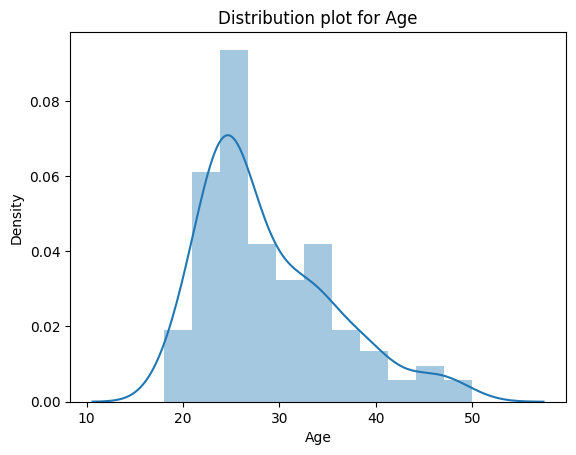

In [ ]:
#Continuous Variable
sns.distplot(data['Age'] , kde = True )
plt.title('Distribution plot for Age')


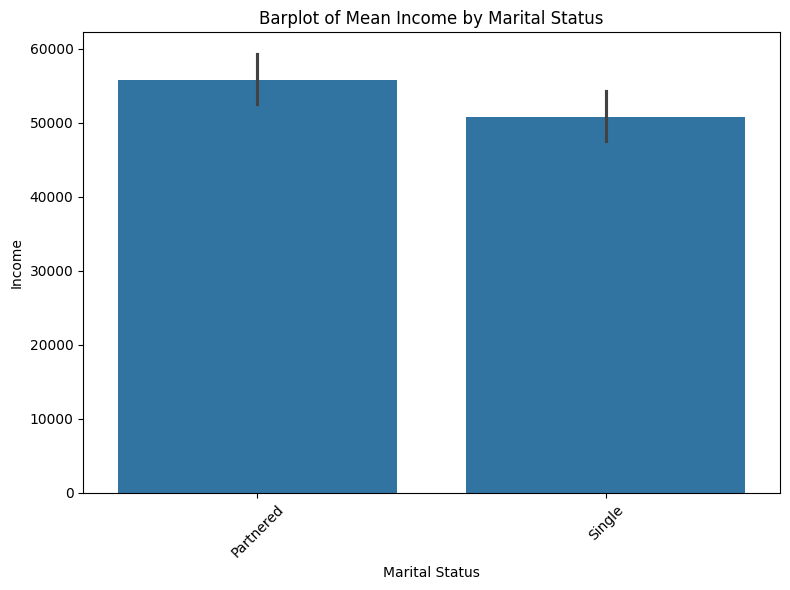

In [ ]:
#Disceret variable

plt.figure(figsize=(8, 6))
sns.barplot(x='MaritalStatus', y='Income', data=data)
plt.title('Barplot of Mean Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

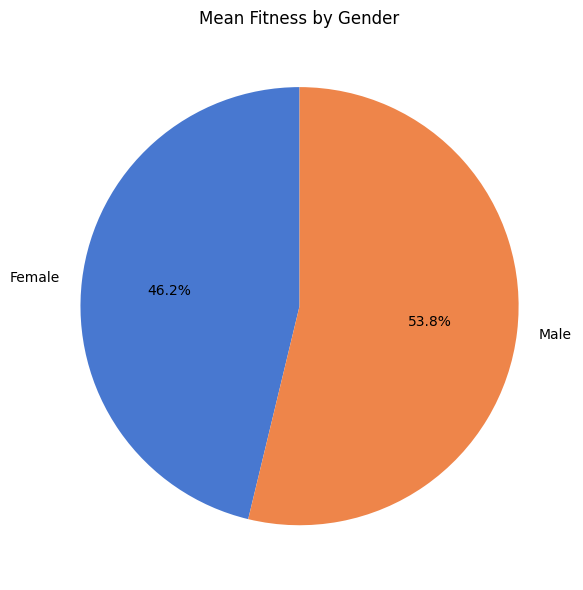

In [ ]:
mean_fitness_by_gender = data.groupby('Gender')['Fitness'].mean()

plt.figure(figsize=(8, 6))
plt.pie(mean_fitness_by_gender, labels=mean_fitness_by_gender.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Mean Fitness by Gender')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis

correlation = data.corr()
correlation

<ipython-input-22-1a65a135d714>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


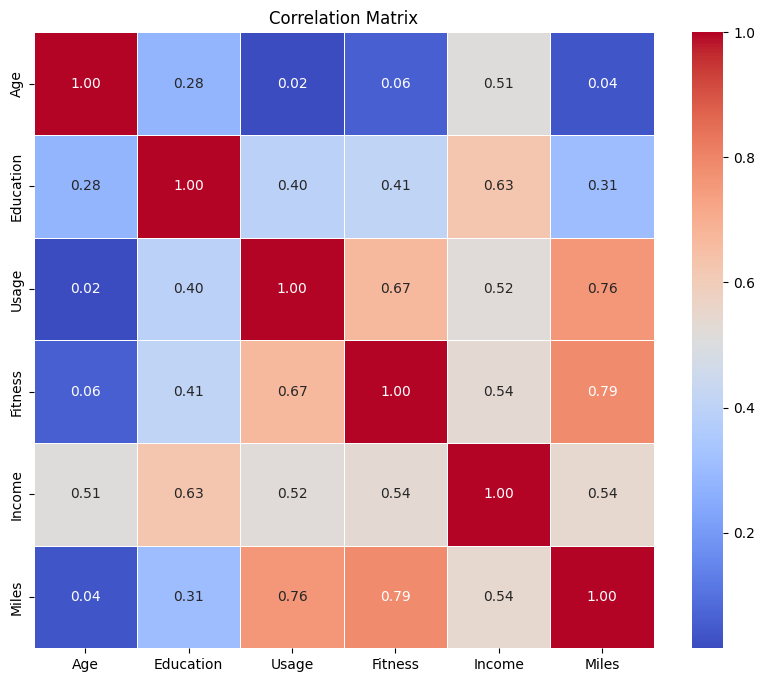

In [ ]:
#Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot= True, cmap = 'coolwarm' , fmt = '.2f' , linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-37-7261d18f5730>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='coolwarm')


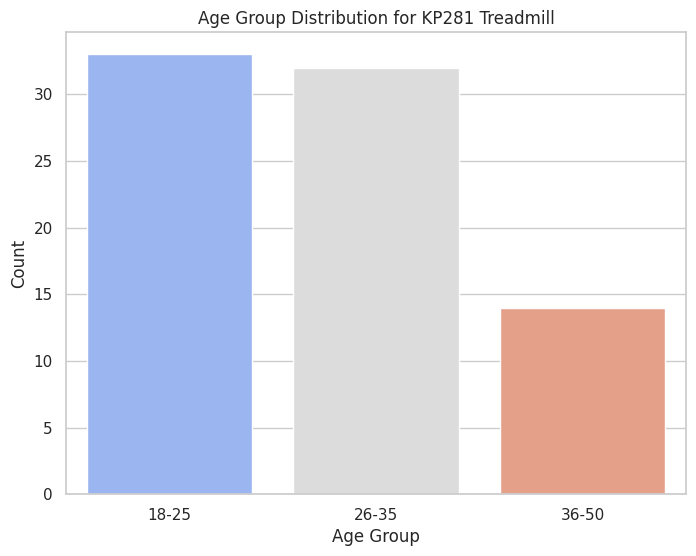

In [ ]:
#Customer profiling

sns.set(style='whitegrid')
kp281_data = data[data['Product'] == 'KP281']

age_groups = pd.cut(kp281_data['Age'], bins=[18, 25, 35, 50], labels=['18-25', '26-35', '36-50'])
age_group_counts = age_groups.value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='coolwarm')
plt.title('Age Group Distribution for KP281 Treadmill')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()




<ipython-input-38-c7018787f702>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')


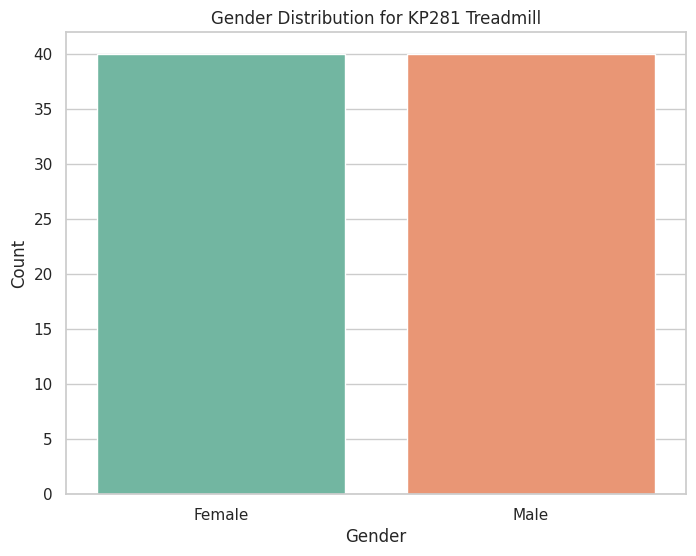

In [ ]:

gender_counts = kp281_data['Gender'].value_counts()

# Plotting gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.title('Gender Distribution for KP281 Treadmill')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



<ipython-input-39-67d5a9e22312>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_group_counts.index, y=income_group_counts.values, palette='Pastel1')


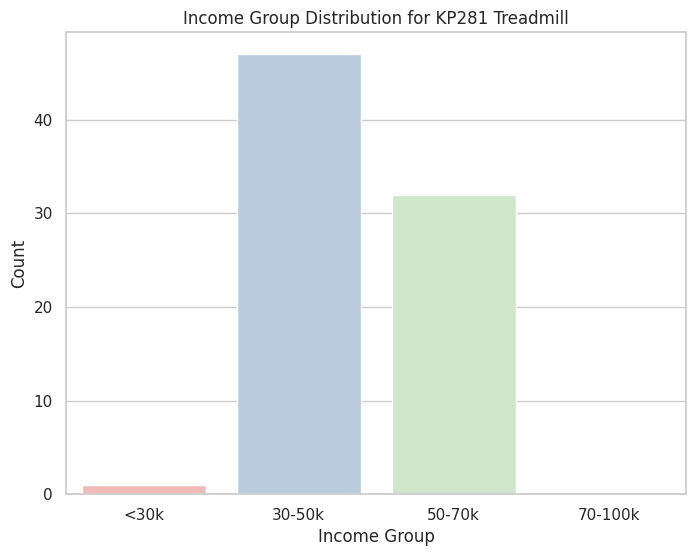

In [ ]:
# Customer profiling by income group
income_groups = pd.cut(kp281_data['Income'], bins=[0, 30000, 50000, 70000, 100000], labels=['<30k', '30-50k', '50-70k', '70-100k'])
income_group_counts = income_groups.value_counts().sort_index()

# Plotting income group distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=income_group_counts.index, y=income_group_counts.values, palette='Pastel1')
plt.title('Income Group Distribution for KP281 Treadmill')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

##Missing Value & Outlier Detection

In [ ]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

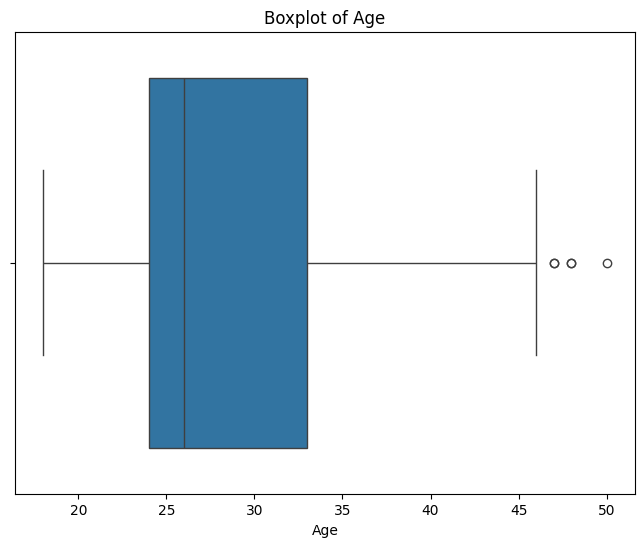

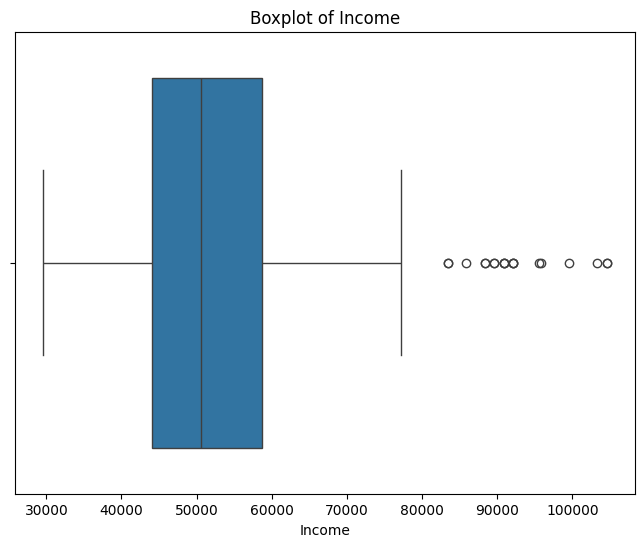

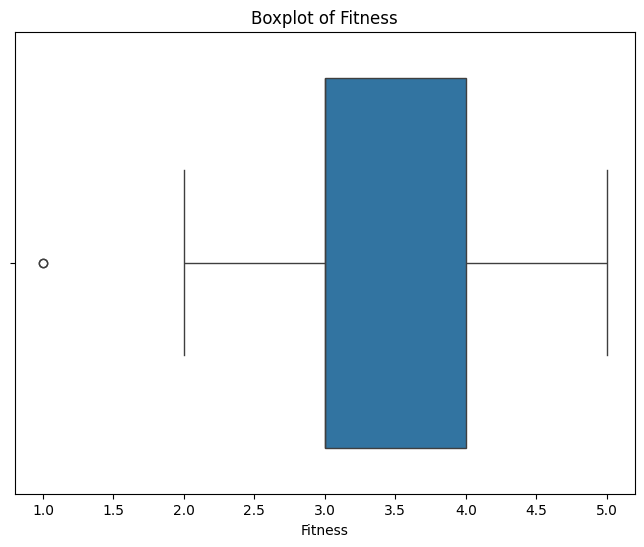

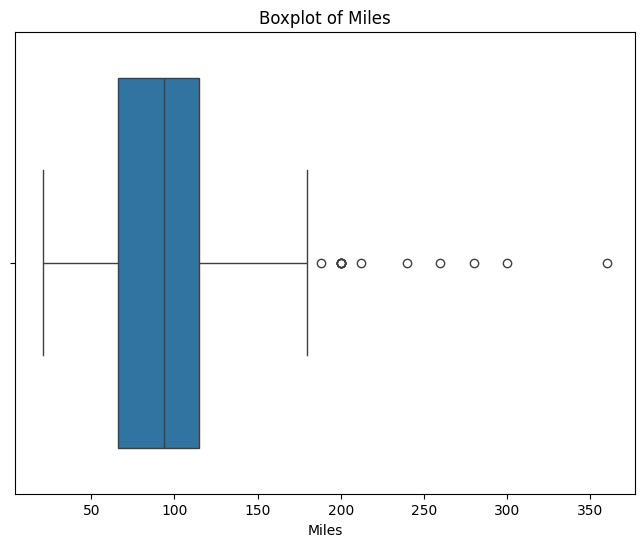

In [ ]:
#Outlier
cols = ['Age' , 'Income' , 'Fitness' , 'Miles']
for c in cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(x = c, data = data)
  plt.title(f'Boxplot of {c}')
  plt.show()

In [ ]:
#Marginal Probability (What percent of customers have purchased KP281, KP481, or KP781):

cross_tab = pd.crosstab(index=data['Product'], columns='count')

marginal_probabilities = cross_tab / cross_tab.sum() * 100

marginal_probabilities


col_0,count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


In [ ]:
# Probability that the customer buys a product based on each column:
prob_by_column = cross_tab / cross_tab.sum(axis=1)[:, None] * 100
prob_by_column


<ipython-input-27-0904094defd3>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  prob_by_column = cross_tab / cross_tab.sum(axis=1)[:, None] * 100


col_0,count
Product,
KP281,100.0
KP481,100.0
KP781,100.0


In [ ]:
#Conditional Probability (e.g., given that a customer is female, what is the probability she'll purchase a KP481):

gender_product_crosstab = pd.crosstab(index=data['Gender'], columns=data['Product'])
female_prob = gender_product_crosstab.loc['Female', 'KP481'] / gender_product_crosstab.loc['Female'].sum() * 100
female_prob


38.15789473684211